# Imports

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Data

## Read data

In [105]:
all_data = []
data_names = []
data_dir = Path("data")
for file in data_dir.glob('*'):
    print(file.name)
    all_data.append(np.load(file))
    data_names.append(file.stem)

Ising_model_J1_0.5_J2_1.0_TIME_2025-04-21_16-37-01.npz
Ising_model_J1_1.0_J2_0.0_TIME_2025-04-21_17-42-10.npz
Ising_model_J1_1.0_J2_0.0_TIME_2025-04-21_18-10-08.npz
Ising_model_J1_1.0_J2_0.0_TIME_2025-04-21_23-01-36.npz


## Output info

In [106]:
idx = 0
print(f"File: {data_names[idx]}")
J1 = data_names[idx][15:18]
J2 = data_names[idx][22:25]
print(f"J1 = {J1}, J2 = {J2}")
print(f"Simulations for Ns = {all_data[idx]['Ns']}")
print(f"Simulations for Ts =({min(all_data[idx]['Ts'])}, {max(all_data[idx]['Ts'])}, {len(all_data[idx]['Ts'])})")

File: Ising_model_J1_0.5_J2_1.0_TIME_2025-04-21_16-37-01
J1 = 0.5, J2 = 1.0
Simulations for Ns = [ 16  32  64 128]
Simulations for Ts =(1.0, 7.0, 20)


In [107]:
data_keys = list(all_data[idx].keys())
data_keys.remove("Ns")
data_keys.remove("Ts")
data_keys

['avg_mags_p',
 'avg_energies_p',
 'heat_capacities_p',
 'avg_mags_n',
 'avg_energies_n',
 'heat_capacities_n']

# Visualizations

## Avg Magnetization

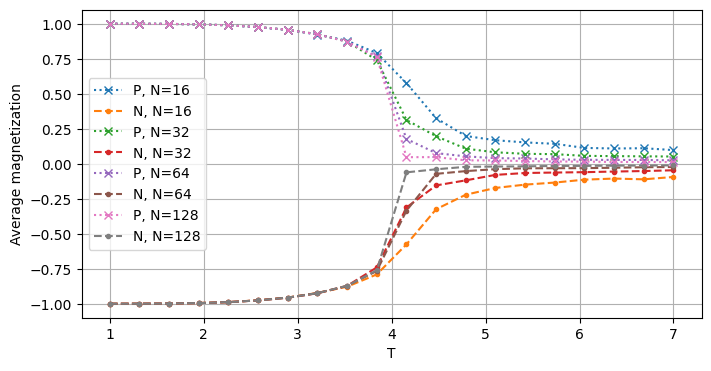

In [108]:
plt.figure(figsize=(8, 4))
for i, N in enumerate(all_data[idx]['Ns']):
    plt.plot(all_data[idx]['Ts'], all_data[idx]['avg_mags_p'][i], 'x:', label=f"P, N={N}")
    try:
        plt.plot(all_data[idx]['Ts'], -all_data[idx]['avg_mags_n'][i], '.--', label=f"N, N={N}")
    except:
        pass

plt.xlabel("T")
plt.ylabel("Average magnetization")
plt.grid()
plt.legend()

## Avg Energy

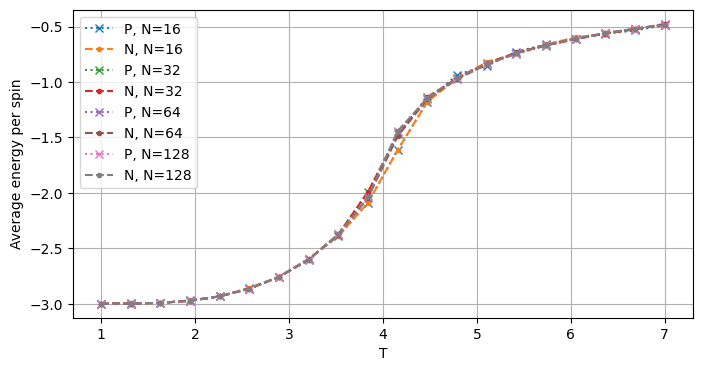

In [109]:
plt.figure(figsize=(8, 4))
for i, N in enumerate(all_data[idx]['Ns']):
    plt.plot(all_data[idx]['Ts'], all_data[idx]['avg_energies_p'][i]/N**2, 'x:', label=f"P, N={N}")
    try:
        plt.plot(all_data[idx]['Ts'], all_data[idx]['avg_energies_n'][i]/N**2, '.--', label=f"N, N={N}")
    except:
        pass
    
plt.xlabel("T")
plt.ylabel("Average energy per spin")
plt.grid()
plt.legend()

## Heat Capacity

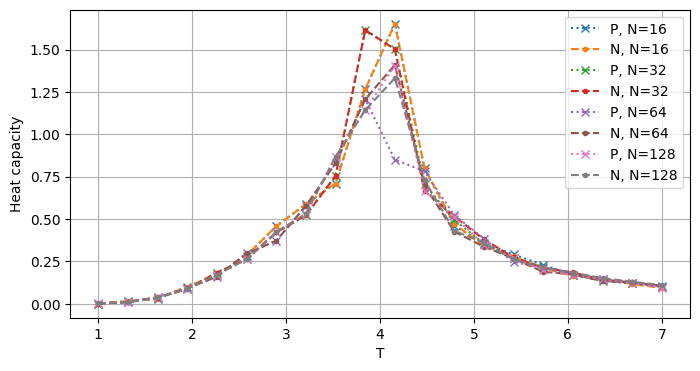

In [110]:
plt.figure(figsize=(8, 4))
for i, N in enumerate(all_data[idx]['Ns']):
    plt.plot(all_data[idx]['Ts'], all_data[idx]['heat_capacities_p'][i], 'x:', label=f"P, N={N}")
    try:
        plt.plot(all_data[idx]['Ts'], all_data[idx]['heat_capacities_n'][i], '.--', label=f"N, N={N}")
    except:
        pass

plt.xlabel("T")
plt.ylabel("Heat capacity")
plt.grid()
plt.legend()